In [1]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



In [2]:
def polynomial_features(x, p,intercept=False):

    """ 
    Generates a polynomial feature matrix with or without
    intercept, based on the values of x. 

    Returns
    -------
    X : numpy vector shape(n,p), if intercept shape(n,p+1)
        the resulting feature matrix of all polynomial combinations
        up to a given degree. Vandermonde format.
    

    Parameters
    ----------
    x : numpy vector shape(n)
        x values from dataset

    p : int
        number of degrees 

    intercept : Bool
        Bool to determine if intercept should be included or not:
        False : no intercept 
        True : include intercept
    """
    
    n = len(x)

    #handling the intercept column
    #to avoid branching in loop
    if intercept: 
        matrix_p = p+1
        start_col = 1
        i_offs = 0

        X = np.zeros((n, matrix_p))
        X[:,0] = np.ones(n)
   
    else:
        matrix_p = p
        start_col = 0
        i_offs = 1
    
        X = np.zeros((n, matrix_p))
    
    for i in range(start_col,matrix_p):
            X[:,i] = np.power(x,i+i_offs)
     
    return X

In [3]:
def OLS_parameters(X, y):
    """
        Calculates the optimal parameters, theta, using the 
        ordinary least squares method.  

        Theta_OLS = inv(X.T @ X) @ X.T @ y

        Returns
        -------
        theta : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method. 

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.
        
        y : numpy array shape (n)
            Y values of the data set.     
    """

    #calculate X^T*X and take the inverse
    XTX = X.T@X
    XTX_i = np.linalg.inv(XTX)

    #calculate X^T*y
    XT_y = X.T @ y
    
    #calculate theta
    theta = XTX_i @ XT_y
    
    return theta

In [4]:
def Ridge_parameters(X, y, lamb):
    """
        Calculates the optimal parameters, r_params, using the 
        ridge regression method.  

        r_params = inv(X.T @ X + lambda I) @ X.T @ y

        Returns
        -------
        r_params : numpy array shape (n)
            the optimal parameters, theta as given by the
            Ridge regression method. 

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.
        
        y : numpy array shape (n)
            Y values of the data set.     
    """
        
    # Assumes X is scaled and has no intercept column    
    
    p = X.shape[1]
    I = np.eye(p)

    r_params = np.linalg.inv(X.T @ X + lamb * I) @ X.T @ y

    return r_params

In [5]:
def gradient_descent_ridge(X,y,eta,lam,num_iters,n_features):
    """
        Calculates the optimal parameters, theta, using the 
        ridge regression and gradient descent

        Returns
        -------
        theta_gdRidge : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method.

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.

        y : numpy array shape (n)
            Y values of the data set. 
        
        eta : int
            gradient descent parameter
    
        lam : int
            learning rate
        
        num_iters : int
            number of iterations

        n_features : int
            number of features in feature matrix
    """

    # Initialize weights for gradient descent
    theta_gdRidge = np.zeros(n_features)

    # Gradient descent loop
    for t in range(num_iters):
        # Compute gradients for Ridge
        grad_Ridge = (2.0/n) * X.T @(X @ theta_gdRidge - y) + 2*lam*theta_gdRidge

        # Update parameters theta
        theta_gdRidge -= eta*grad_Ridge 

    # After the loop, theta contains the fitted coefficients
    return theta_gdRidge


In [6]:
def gradient_descent_OLS(X,y,eta,num_iters,n_features):
    """
        Calculates the optimal parameters, theta, using the 
        ordinary least squares method and gradient descent

        Returns
        -------
        theta_gdOLS : numpy array shape (n)
            the optimal parameters, theta as given by the
            OLS method.

        Parameters
        ----------
        X : numpy array shape (n,f)
            Feature matrix for the data, where n is the number
            of data points and f is the number of features.

        y : numpy array shape (n)
            Y values of the data set. 
        
        eta : int
            gradient descent parameter
    
        lam : int
            learning rate
        
        num_iters : int
            number of iterations

        n_features : int
            number of features in feature matrix
    """
    
    # Initialize weights for gradient descent
    theta_gdOLS = np.zeros(n_features)

    # Gradient descent loop
    for t in range(num_iters):
        # Compute gradients for OSL and Ridge
        grad_OLS = (2.0/n)*X.T @ (X @ theta_gdOLS - y)

        # Update parameters theta
        theta_gdOLS -= eta*grad_OLS

    # After the loop, theta contains the fitted coefficients
    return theta_gdOLS

In [7]:

def MSE(y, y_predict):
    """
    Calculates Mean Squared Error (MSE)
    between true and predicted values

    Returns
    -------
    mse : float
        MSE error value

    Parameters
    ----------

    y : numpy array shape (n)
        Y values of the data set. 
    
    y: numpy array shape (n)
        Predicted y values of the data set.
"""
    n = np.size(y_predict)
    mse = (1/n) * np.sum((y - y_predict)**2)
    return mse


In [8]:

def R2(y, y_predict):
    """
    Calculates R2 score
    between true and predicted values

    Returns
    -------
    r2 : float
        R2 score value

    Parameters
    ----------

    y : numpy array shape (n)
        Y values of the data set. 
    
    y: numpy array shape (n)
        Predicted y values of the data set.
"""
    ss_res = np.sum((y - y_predict)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


In [ ]:

def standard_scaler(X_train, X_test):
    """
    Standardizes the feature matrix by removing the mean
    and scaling to unit variance.
    
    Verified to give identical results as sklearn.preprocessing.StandardScaler

    Returns
    -------
    X_train_scaled : numpy array shape (n,f)
        Standardized training feature matrix

    X_test_scaled : numpy array shape (n,f)
        Standardized test feature matrix

    Parameters
    ----------

    X_train : numpy array shape (n,f)
        Training feature matrix

    X_test : numpy array shape (n,f)
        Test feature matrix
    """
    X_mean = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)

    X_train_scaled = (X_train - X_mean) / X_std
    X_test_scaled = (X_test - X_mean) / X_std

    return X_train_scaled, X_test_scaled


In [10]:
# could add noise/standard deviation variable in plots, but is it needed?

def plot_mse(n_datapoints, polynomial_degree, mse_train, mse_test, noise=False):
    """
    Plots the Mean Squared Error (MSE) for different polynomial degrees.
    
    Returns
    -------
    Saves and shows a plot of MSE for training and test sets.

    Parameters
    ----------

    n_datapoints : int
        number of data points

    polynomial degree : int
        polynomial degree for regression

    mse_train : list
        list of MSE values for training set
    
    mse_test : list
        list of MSE values for test set

    noise : Bool
        Bool to determine if noise is included or not in dataset:
    """

    if noise:
        text = f'MSE for Different Polynomial Degrees with Noise\nNumber of data points: {n_datapoints}'
        filename = f'MSE for Different Polynomial Degrees with Noise - Number of data points {n_datapoints}.png'
        plt.title(text)
    else:
        text = f'MSE for Different Polynomial Degrees without Noise\nNumber of data points: {n_datapoints}'
        filename = f'MSE for Different Polynomial Degrees without Noise - Number of data points {n_datapoints}.png'
        plt.title(text)
    plt.plot(polynomial_degree, mse_train, label='MSE train')
    plt.plot(polynomial_degree, mse_test, label='MSE test')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.savefig(filename)
    plt.show()
    plt.close()



In [11]:
# could add noise/standard deviation variable in plots, but is it needed?

def plot_r2(n_datapoints, polynomial_degree, r2_train, r2_test, noise=False):
    """
    Plots the R2 Score for different polynomial degrees.
    
    Returns
    -------
    Saves and shows a plot of R2 Score for training and test sets.

    Parameters
    ----------

    n_datapoints : int
        number of data points

    polynomial degree : int
        polynomial degree for regression

    mse_train : list
        list of MSE values for training set
    
    mse_test : list
        list of MSE values for test set

    noise : Bool
        Bool to determine if noise is included or not in dataset:
    """
        
    if noise:
        plt.title(f'R2 Score for Different Polynomial Degrees with Noise\nNumber of data points: {n_datapoints}')
        filename = f'R2 for Different Polynomial Degrees with Noise - Number of data points {n_datapoints}.png'
    else:
        plt.title(f'R2 Score for Different Polynomial Degrees without Noise\nNumber of data points: {n_datapoints}')
        filename = f'R2 for Different Polynomial Degrees without Noise - Number of data points {n_datapoints}.png'
    plt.plot(polynomial_degree, r2_train, label='R2 train')
    plt.plot(polynomial_degree, r2_test, label='R2 test')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('R2 Score')
    plt.legend()
    plt.savefig(filename)
    plt.show()
    plt.close()

In [12]:

def explore_polynomial_degree(X_train, X_test, y_train, y_test, p):
    """
    Explores the effect of polynomial degree on MSE and R2 for
    both training and test datasets using OLS regression.

    Returns
    -------

    polynomial_degree: list
        list of polynomial degrees explored
    
    mse_train: list
        list of MSE values for training data
    
    mse_test: list
        list of MSE values for test data

    r2_train: list
        list of R2 values for training data

    r2_test: list
        list of R2 values for test data

    Parameters
    ----------
    X_train : numpy array shape (n,f)
        Training feature matrix

    X_test : numpy array shape (n,f)
        Test feature matrix   

    y_train : numpy array shape (n)
        Training target vector

    y_test : numpy array shape (n)
        Test target vector
   
    """

    polynomial_degree = list()
    mse_train = list()
    mse_test = list()
    r2_train = list()
    r2_test = list()

    for degree in range(1, p): # should range be like this?
        polynomial_degree.append(degree)

        # Extract the relevant columns from design matrix for the current degree
        X_train_sliced = X_train[:, :degree] 
        X_test_sliced = X_test[:, :degree]
        
        # OLS Regression
        theta_OLS = OLS_parameters(X_train_sliced, y_train)
        y_tilde_train = X_train_sliced @ theta_OLS
        y_tilde_test = X_test_sliced @ theta_OLS

        # Calculate MSE for training and test data
        mse_train_OLS = MSE(y_train, y_tilde_train)
        mse_test_OLS = MSE(y_test, y_tilde_test)
        mse_train.append(mse_train_OLS)
        mse_test.append(mse_test_OLS)
        print(f"Polynomial degree: {degree}, MSE_train_OLS: {mse_train_OLS}, MSE_test_OLS: {mse_test_OLS}")

        # Calculate R2 for training and test data
        r2_train_OLS = R2(y_train, y_tilde_train)
        r2_test_OLS = R2(y_test, y_tilde_test)
        r2_train.append(r2_train_OLS)
        r2_test.append(r2_test_OLS)
        print(f"Polynomial degree: {degree}, R2_train_OLS: {r2_train_OLS}, R2_test_OLS: {r2_test_OLS}")


        # Sklearn Linear Regression without intercept for validation of code, test dataset only.
        # only for validation of own code        
        model = LinearRegression(fit_intercept=False)
        model.fit(X_train_sliced, y_train)
        y_pred_sklearn = model.predict(X_test_sliced)
        mse_sklearn = MSE(y_test, y_pred_sklearn)
        r2_sklearn = R2(y_test, y_pred_sklearn)
        print(f"Polynomial degree: {degree}, Sklearn test R2: {r2_sklearn}, Sklearn test MSE: {mse_sklearn}")
        print(f"Polynomial degree: {degree}, R2 test: Own - sklearn {r2_test_OLS - r2_sklearn}, MSE test: Own - sklearn {mse_test_OLS - mse_sklearn}")
        print('\n') # just to add line shift between different degrees in output
        
    return polynomial_degree, mse_train, mse_test, r2_train, r2_test



In [ ]:
# Runge's function

# parameters to explore
n_datapoints = 100 # changed and ran code with different values. Could have been implemented as a list and looped over, but regarded as not necessary.
standard_deviation = 0.1 # for noise, should we play around with this values as well in analysis?
p = 15 # polynomial degree
np.random.seed(250)  # ensure reproducibility

# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

# generating data with noise
x_noise = np.linspace(-1, 1, num=n_datapoints) + np.random.normal(0, standard_deviation, n_datapoints)
y_noise = 1 / (1 + 25 * x_noise**2)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Polynomial degree: 1, MSE_train_OLS: 0.12209356337845075, MSE_test_OLS: 0.28647009106957444
Polynomial degree: 1, R2_train_OLS: -0.8542968272733464, R2_test_OLS: -1.4640176671446659
Polynomial degree: 1, Sklearn test R2: -1.4640176671446659, Sklearn test MSE: 0.28647009106957444
Polynomial degree: 1, R2 test: Own - sklearn 0.0, MSE test: Own - sklearn 0.0


Polynomial degree: 2, MSE_train_OLS: 0.08702271494854788, MSE_test_OLS: 0.17319271846123246
Polynomial degree: 2, R2_train_OLS: -0.32165807733551577, R2_test_OLS: -0.4896840243110929
Polynomial degree: 2, Sklearn test R2: -0.4896840243110929, Sklearn test MSE: 0.17319271846123246
Polynomial degree: 2, R2 test: Own - sklearn 0.0, MSE test: Own - sklearn 0.0


Polynomial degree: 3, MSE_train_OLS: 0.08695420573212674, MSE_test_OLS: 0.17357347922822772
Polynomial degree: 3, R2_train_

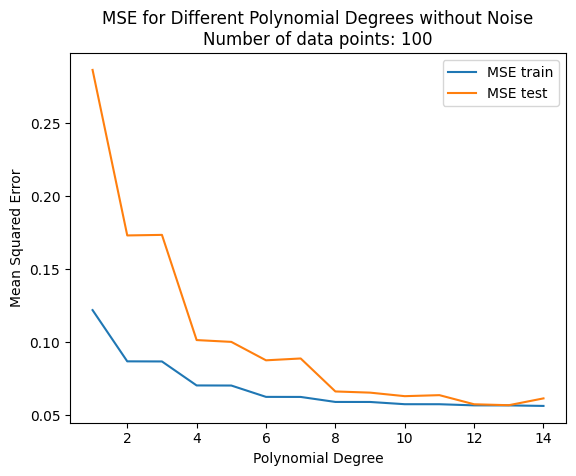

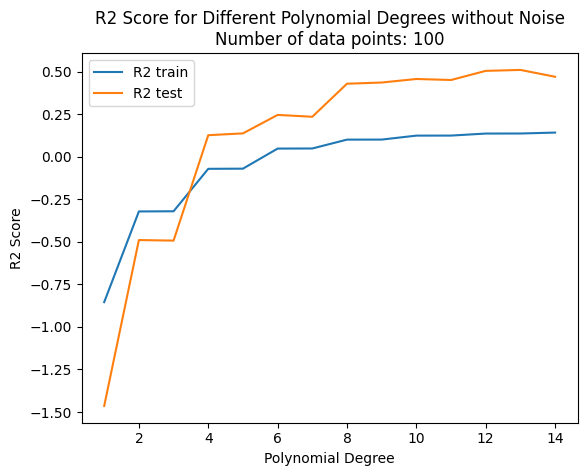

Polynomial degree: 1, MSE_train_OLS: 0.1536908759884581, MSE_test_OLS: 0.13412703974130935
Polynomial degree: 1, R2_train_OLS: -0.9714941698584696, R2_test_OLS: -0.9099046197324048
Polynomial degree: 1, Sklearn test R2: -0.9099046197324048, Sklearn test MSE: 0.13412703974130935
Polynomial degree: 1, R2 test: Own - sklearn 0.0, MSE test: Own - sklearn 0.0


Polynomial degree: 2, MSE_train_OLS: 0.11465214447945025, MSE_test_OLS: 0.11686872570994265
Polynomial degree: 2, R2_train_OLS: -0.47071862886630944, R2_test_OLS: -0.6641545177330384
Polynomial degree: 2, Sklearn test R2: -0.6641545177330377, Sklearn test MSE: 0.11686872570994261
Polynomial degree: 2, R2 test: Own - sklearn -6.661338147750939e-16, MSE test: Own - sklearn 4.163336342344337e-17


Polynomial degree: 3, MSE_train_OLS: 0.11460297067917212, MSE_test_OLS: 0.11794299798310587
Polynomial degree: 3, R2_train_OLS: -0.4700878441178029, R2_test_OLS: -0.6794516388901299
Polynomial degree: 3, Sklearn test R2: -0.6794516388901299, S

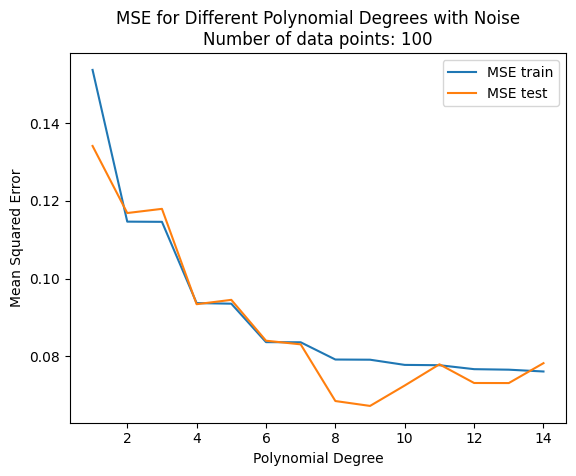

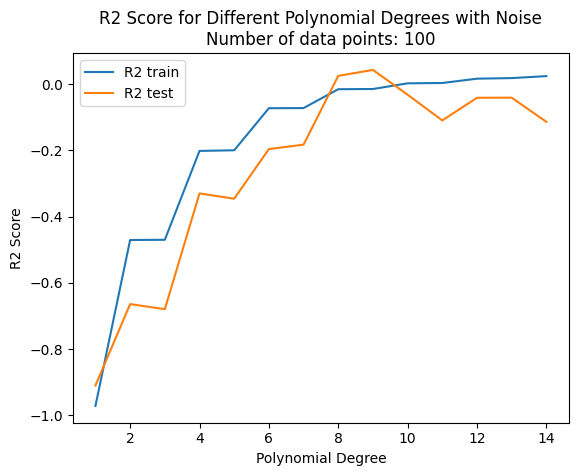

In [ ]:
# comments about intercept....
# Example for lectures: Should we calculate intercept by: scaling y_train --> intercept_ = y_scaler - X_train_mean@OwnRidgeTheta #The intercept can be shifted so the model can predict on uncentered data
# Or leaving intercept out as in code below 




# Runge's function analysis
##################################################

# No noise
# creating design matrix with polynomial features: p
X = polynomial_features(x, p,intercept=False) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 


# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_scaled, X_test_scaled = standard_scaler(X_train, X_test)

# scaled data for features as input 
polynomial_degree, mse_train, mse_test, r2_train, r2_test = explore_polynomial_degree(X_train_scaled, X_test_scaled, y_train, y_test, p)
plot_mse(n_datapoints, polynomial_degree, mse_train, mse_test, noise=False)
plot_r2(n_datapoints, polynomial_degree, r2_train, r2_test, noise=False)

##################################################

# With noise
# creating design matrix with polynomial features: p
X_noise = polynomial_features(x_noise, p,intercept=False) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2)
X_train_scaled_noise, X_test_scaled_noise = standard_scaler(X_train_noise, X_test_noise)

# scaled data for features as input 
polynomial_degree, mse_train, mse_test, r2_train, r2_test = explore_polynomial_degree(X_train_scaled_noise, X_test_scaled_noise, y_train_noise, y_test_noise, p)
plot_mse(n_datapoints, polynomial_degree, mse_train, mse_test, noise=True)
plot_r2(n_datapoints, polynomial_degree, r2_train, r2_test, noise=True)




# About scaling - information for report

See "machine learning with Python and Scikit-learn - page 119-122" and https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-standard-scaler-section.
From scikit documentation handling of outliers are important when scaling. Standard scaler is not robust to outliers, men our dataset is generated with some noise but no outliers. Standard scaler is hence ok to use, and mean and variance is mentioned. Write arguement for using standard scaler and not normaliazation.

From lecture notes: 

The StandardScaler function in Scikit-Learn ensures that for each feature/predictor we study the mean value is zero and the variance is one (every column in the design/feature matrix). This scaling has the drawback that it does not ensure that we have a particular maximum or minimum in our data set.

The Normalizer scales each data point such that the feature vector has a euclidean length of one. In other words, it projects a data point on the circle (or sphere in the case of higher dimensions) with a radius of 1. 
This means every data point is scaled by a different number (by the inverse of it’s length). This normalization is often used when only the direction (or angle) of the data matters, not the length of the feature vector.

The RobustScaler works similarly to the StandardScaler in that it ensures statistical properties for each feature that guarantee that they are on the same scale. 
However, the RobustScaler uses the median and quartiles, instead of mean and variance. This makes the RobustScaler ignore data points that are very different from the rest (like measurement errors). 
These odd data points are also called outliers, and might often lead to trouble for other scaling techniques.